In [1]:
# Using xr, open cyg.ddmi.s20180801-030000-e20180801-210000.l3.grid-soil-moisture-36km.a32.d33.nc and print the metadata

import xarray as xr
import numpy as np

from mapper_functions import plot_global_tight_pcm

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/data/cyg.ddmi.s20180803-030000-e20180803-210000.l3.grid-soil-moisture-36km.a32.d33.nc')

print(ds)

<xarray.Dataset> Size: 10MB
Dimensions:         (time: 1, lat: 252, lon: 802, timeslices: 4, startstop: 2)
Coordinates:
  * time            (time) datetime64[ns] 8B 2018-08-03T12:00:00
    latitude        (lat, lon) float32 808kB ...
    longitude       (lat, lon) float32 808kB ...
Dimensions without coordinates: lat, lon, timeslices, startstop
Data variables:
    SM_daily        (time, lat, lon) float32 808kB ...
    SM_subdaily     (timeslices, lat, lon) float32 3MB ...
    SIGMA_daily     (time, lat, lon) float32 808kB ...
    SIGMA_subdaily  (timeslices, lat, lon) float32 3MB ...
    timeintervals   (timeslices, startstop) datetime64[ns] 64B ...
Attributes: (12/39)
    summary:                   CYGNSS is a NASA Earth Venture mission, manage...
    comment:                   This Level 3 gridded product combines all 8 x ...
    program:                   CYGNSS
    project:                   CYGNSS
    references:                Ruf, C., D. McKague, D. Posselt, S. Gleason, M...
   

In [2]:
# Import time, latitudes and longitudes
time = ds['time']
timeintervals = ds['timeintervals']
latitude = ds['latitude']
longitude = ds['longitude']

# Import soil moisture
sm_daily = ds['SM_daily']
sm_subdaily = ds['SM_subdaily']
sigma_daily = ds['SIGMA_daily']
sigma_subdaily = ds['SIGMA_subdaily']

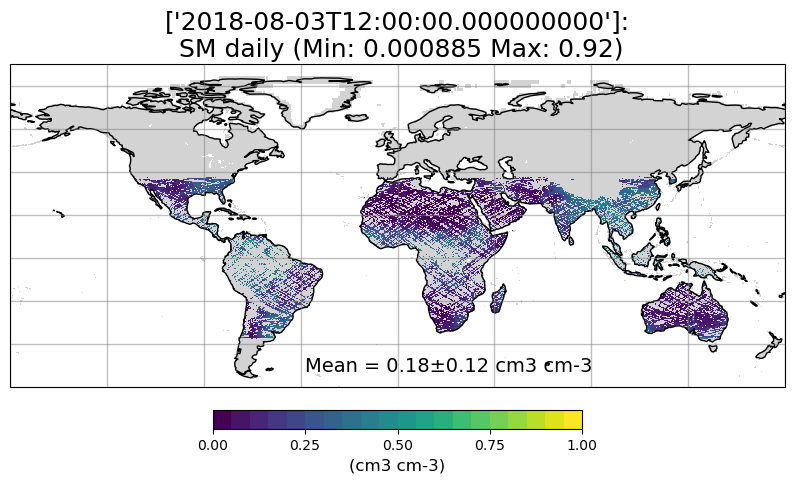

In [3]:
# Rearrange 2D data into 1D

lats = latitude.values.flatten()
lons = longitude.values.flatten()
sm_daily = sm_daily.values.flatten()


n_gridcell = len(lats)

# Plot the data
obarray = np.empty([n_gridcell, 3])
obarray.fill(np.nan)
obarray[:, 1] = lons
obarray[:, 2] = lats

obarray[:, 0] = sm_daily
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True,f'{time.values}:\n SM daily (Min: {minval:.3g} Max: {maxval:.3g})','cm3 cm-3', 0, 1)



In [4]:
# Dimensions of sm_subdaily
print(sm_subdaily.shape)

print(timeintervals.values)

(4, 252, 802)
[['2018-08-03T00:00:00.000000000' '2018-08-03T06:00:00.000000000']
 ['2018-08-03T12:00:00.000000000' '2018-08-03T18:00:00.000000000']
 ['2018-08-03T06:00:00.000000000' '2018-08-03T12:00:00.000000000']
 ['2018-08-03T18:00:00.000000000' '2018-08-04T00:00:00.000000000']]


In [5]:
timeintervals = timeintervals.values

print(timeintervals[0])
print(timeintervals[1])
print(timeintervals[2])
print(timeintervals[3])


['2018-08-03T00:00:00.000000000' '2018-08-03T06:00:00.000000000']
['2018-08-03T12:00:00.000000000' '2018-08-03T18:00:00.000000000']
['2018-08-03T06:00:00.000000000' '2018-08-03T12:00:00.000000000']
['2018-08-03T18:00:00.000000000' '2018-08-04T00:00:00.000000000']


In [6]:
# Create a list of tuples with original indices and time intervals
indexed_timeintervals = [(index, tuple(interval)) for index, interval in enumerate(timeintervals)]

# Sort based on the first element of each tuple
indexed_timeintervals.sort(key=lambda x: x[1][0])

# Extract sorted indices
sorted_indices = [index for index, interval in indexed_timeintervals]

# Extract sorted time intervals
timeintervals_sorted = np.array([interval for index, interval in indexed_timeintervals])

# Format the datetime strings to remove the decimal places in the seconds
formatted_timeintervals = [[str(t).split('.')[0] for t in interval] for interval in timeintervals_sorted]

print("Sorted indices:", sorted_indices)
print("Sorted time intervals:", timeintervals_sorted)

Sorted indices: [0, 2, 1, 3]
Sorted time intervals: [['2018-08-03T00:00:00.000000000' '2018-08-03T06:00:00.000000000']
 ['2018-08-03T06:00:00.000000000' '2018-08-03T12:00:00.000000000']
 ['2018-08-03T12:00:00.000000000' '2018-08-03T18:00:00.000000000']
 ['2018-08-03T18:00:00.000000000' '2018-08-04T00:00:00.000000000']]


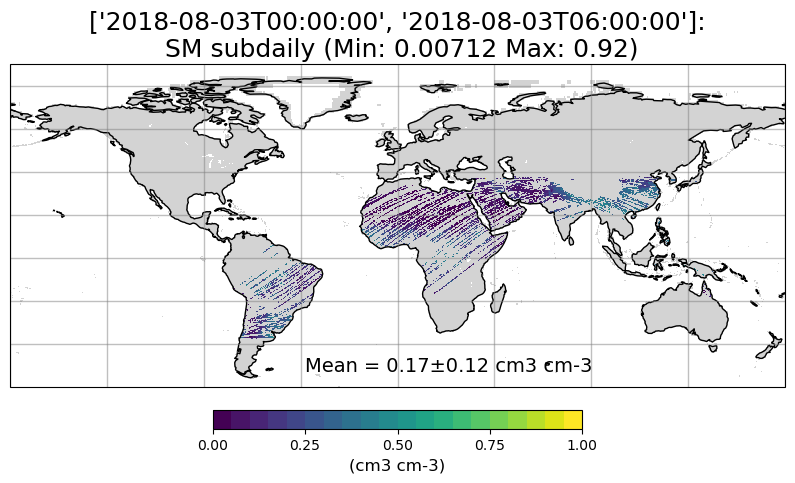

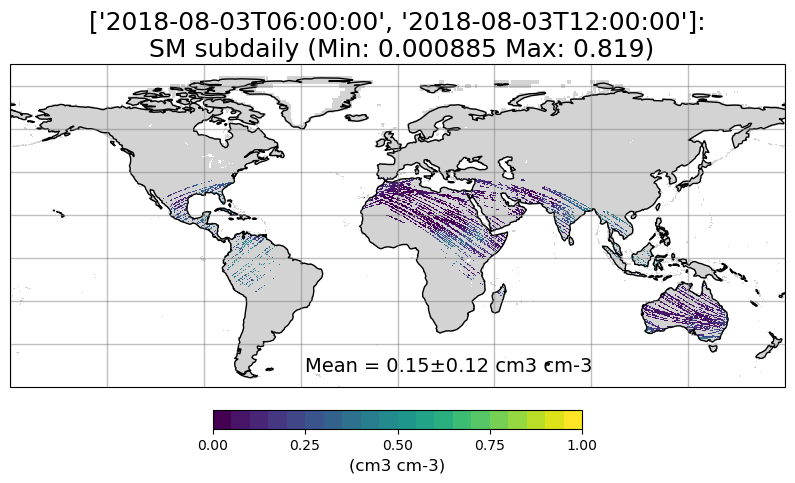

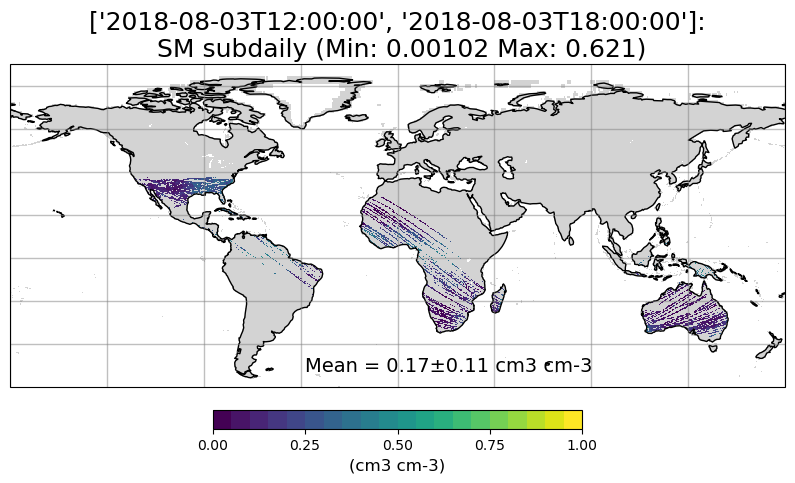

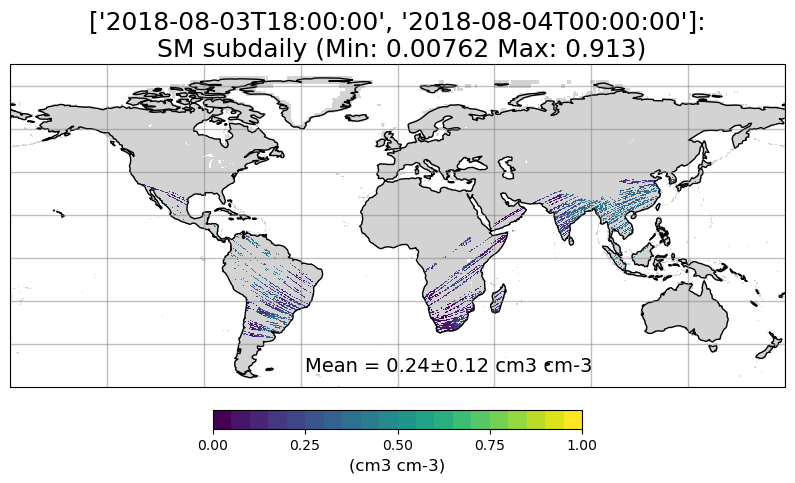

In [7]:
# Plot sm_subdaily for each time interval in timeintervals_sorted using plot_global_tight_pcm
for i in range(len(timeintervals_sorted)):
    sm_subdaily_interval = sm_subdaily[i, :, :].values.flatten()
    obarray[:, 0] = sm_subdaily_interval
    maxval = np.nanmax(obarray[:, 0])
    minval = np.nanmin(obarray[:, 0])
    plot_global_tight_pcm(obarray, False, True, f'{formatted_timeintervals[i]}:\n SM subdaily (Min: {minval:.3g} Max: {maxval:.3g})', 'cm3 cm-3', 0, 1) 

    # If i = 0, copy sm_subdaily_interval to use in later analysis
    if i == 0:
        sm_subdaily_interval_0 = sm_subdaily_interval.copy()

<xarray.Dataset> Size: 3MB
Dimensions:              (lat: 252, lon: 802)
Dimensions without coordinates: lat, lon
Data variables:
    latitude             (lat, lon) float32 808kB ...
    longitude            (lat, lon) float32 808kB ...
    flag_small_SM_range  (lat, lon) uint8 202kB ...
    flag_poor_SMAP       (lat, lon) uint8 202kB ...
    flag_high_ubrmsd     (lat, lon) uint8 202kB ...
    flag_few_obs         (lat, lon) uint8 202kB ...
    flag_low_signal      (lat, lon) uint8 202kB ...
Attributes: (12/37)
    source:                 ucar_cu_cygnss_sm_v1_static_flags.nc
    id:                     PODAAC-CYGNU-L3SM1
    ShortName:              CYGNSS_L3_SOIL_MOISTURE_V1.0
    title:                  UCAR/CU CYGNSS Level 3 Soil Moisture Product
    summary:                CYGNSS soil moisture static quality flag file
    comment:                Dataset created by UCAR and CU Boulder
    ...                     ...
    geospatial_lon_min:     -135.0
    geospatial_lon_max:     164.

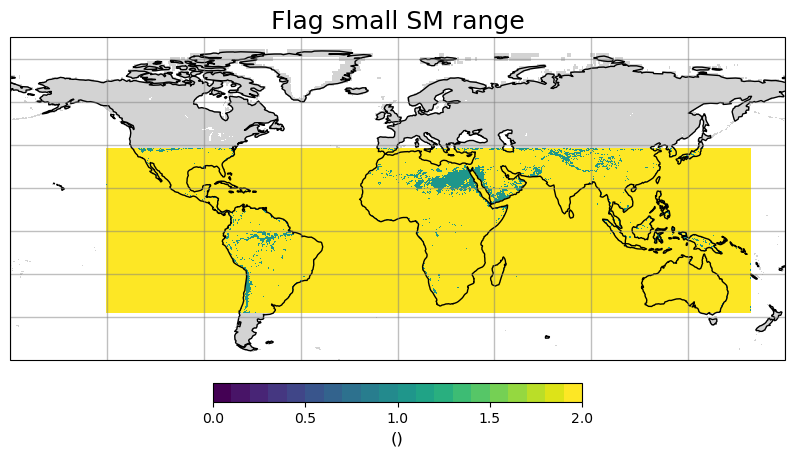

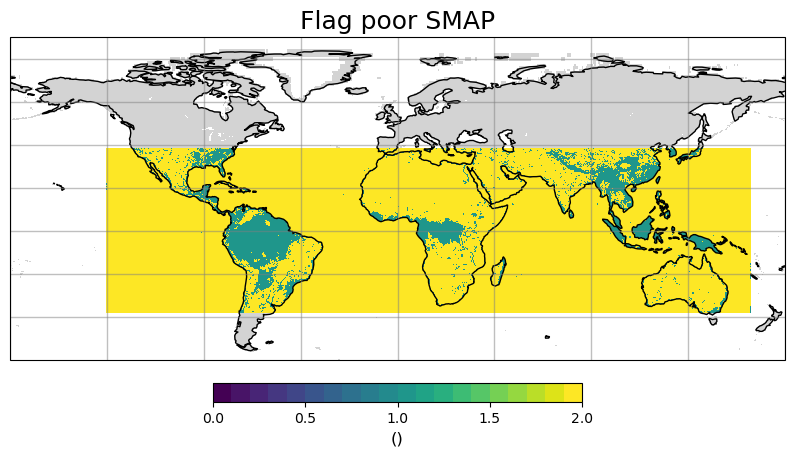

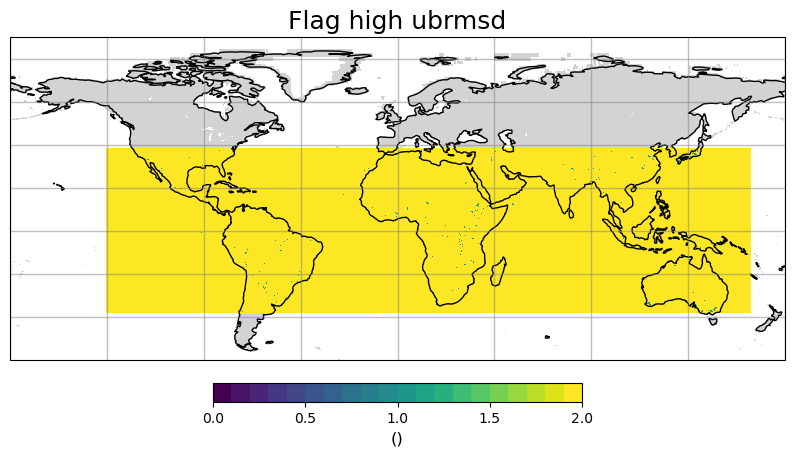

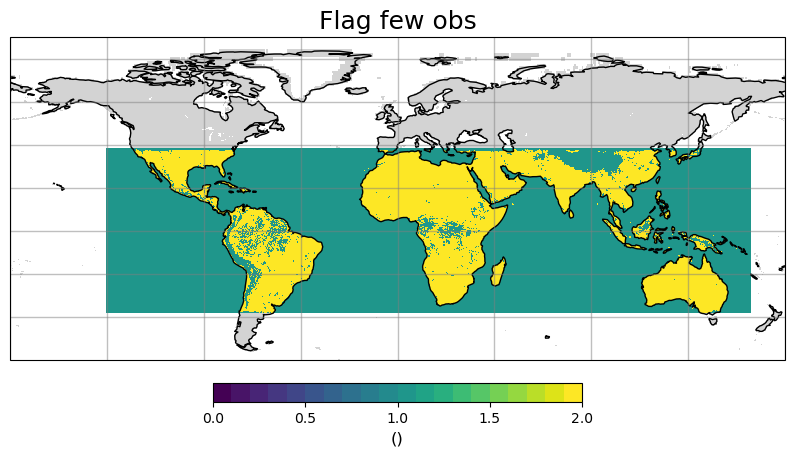

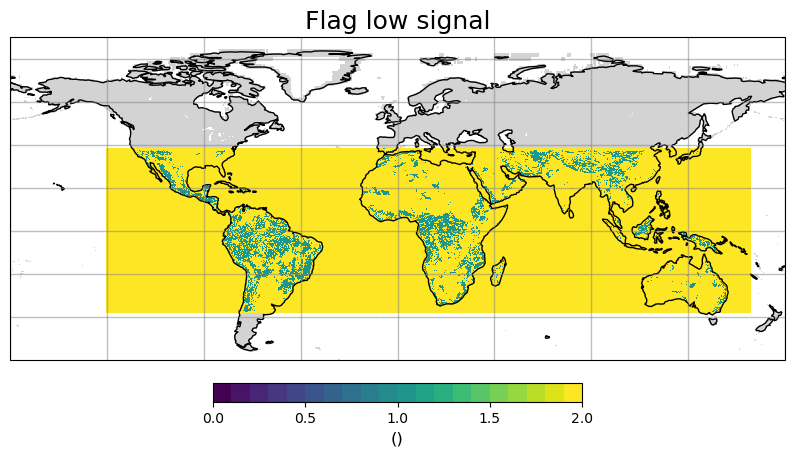

In [8]:
# Open '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/ucar_cu_cygnss_sm_v1_static_flags.nc and map each QC flag in it

ds = xr.open_dataset('/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/ucar_cu_cygnss_sm_v1_static_flags.nc')

print(ds)

# Import the QC flags flag_small_SM_range, flag_poor_SMAP, flag_high_ubrmsd, flag_few_obs, flag_low_signal

flag_small_SM_range = ds['flag_small_SM_range']
flag_poor_SMAP = ds['flag_poor_SMAP']
flag_high_ubrmsd = ds['flag_high_ubrmsd']
flag_few_obs = ds['flag_few_obs']
flag_low_signal = ds['flag_low_signal']

# Rearrange 2D data into 1D

flag_small_SM_range = flag_small_SM_range.values.flatten()
flag_poor_SMAP = flag_poor_SMAP.values.flatten()
flag_high_ubrmsd = flag_high_ubrmsd.values.flatten()
flag_few_obs = flag_few_obs.values.flatten()
flag_low_signal = flag_low_signal.values.flatten()

# Plot the data
obarray = np.empty([n_gridcell, 3])
obarray.fill(np.nan)
obarray[:, 1] = lons
obarray[:, 2] = lats

obarray[:, 0] = flag_small_SM_range
plot_global_tight_pcm(obarray, False, False, 'Flag small SM range', '', 0, 2)

obarray[:, 0] = flag_poor_SMAP
plot_global_tight_pcm(obarray, False, False, 'Flag poor SMAP', '', 0, 2)

obarray[:, 0] = flag_high_ubrmsd
plot_global_tight_pcm(obarray, False, False, 'Flag high ubrmsd', '', 0, 2)

obarray[:, 0] = flag_few_obs
plot_global_tight_pcm(obarray, False, False, 'Flag few obs', '', 0, 2)

obarray[:, 0] = flag_low_signal
plot_global_tight_pcm(obarray, False, False, 'Flag low signal', '', 0, 2)

In [9]:
# Print the first 100 values of each flag
print("Flag small SM range:", flag_small_SM_range[:100])
print("Flag poor SMAP:", flag_poor_SMAP[:100])
print("Flag high ubrmsd:", flag_high_ubrmsd[:100])
print("Flag few obs:", flag_few_obs[:100])
print("Flag low signal:", flag_low_signal[:100])

# Print the unique values of each flag
print("Unique values of flag small SM range:", np.unique(flag_small_SM_range))
print("Unique values of flag poor SMAP:", np.unique(flag_poor_SMAP))
print("Unique values of flag high ubrmsd:", np.unique(flag_high_ubrmsd))
print("Unique values of flag few obs:", np.unique(flag_few_obs))
print("Unique values of flag low signal:", np.unique(flag_low_signal) )

# Print the number of unique values of each flag
print("Number of unique values of flag small SM range:", len(np.unique(flag_small_SM_range)))
print("Number of unique values of flag poor SMAP:", len(np.unique(flag_poor_SMAP)))
print("Number of unique values of flag high ubrmsd:", len(np.unique(flag_high_ubrmsd)))
print("Number of unique values of flag few obs:", len(np.unique(flag_few_obs)))
print("Number of unique values of flag low signal:", len(np.unique(flag_low_signal)))

# Print the number of NaN values in each flag and the number of each unique value
print("Number of NaN values in flag small SM range:", np.sum(np.isnan(flag_small_SM_range)))
print("Number of each unique value in flag small SM range:", np.unique(flag_small_SM_range, return_counts=True))


Flag small SM range: [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]
Flag poor SMAP: [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255]
Flag high ubrmsd: [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 2

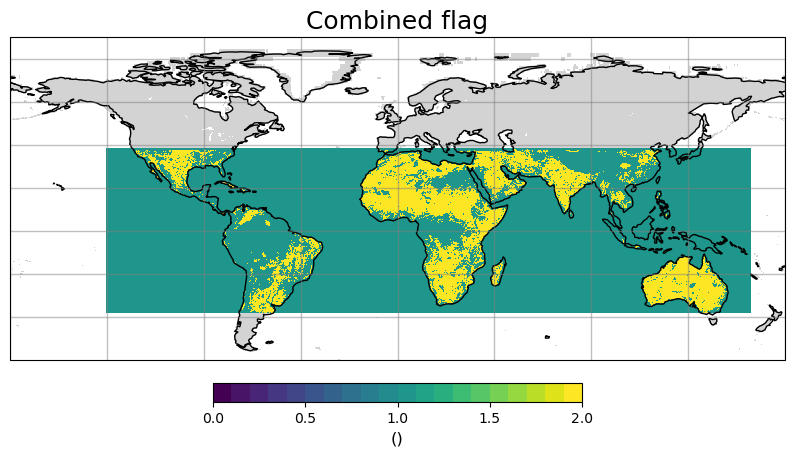

In [10]:
# Assuming flag arrays are flattened and of the same length
combined_flag = np.full(flag_small_SM_range.shape, 255)

for i in range(flag_small_SM_range.shape[0]):
    if (flag_small_SM_range[i] == 1 or 
        flag_poor_SMAP[i] == 1 or 
        flag_high_ubrmsd[i] == 1 or 
        flag_few_obs[i] == 1 or 
        flag_low_signal[i] == 1):
        combined_flag[i] = 1

# Plot the combined flag
obarray[:, 0] = combined_flag
plot_global_tight_pcm(obarray, False, False, 'Combined flag', '', 0, 2)

Number of data QC-d out: 11563
The fraction of data QC'd out: 0.3739892619186235


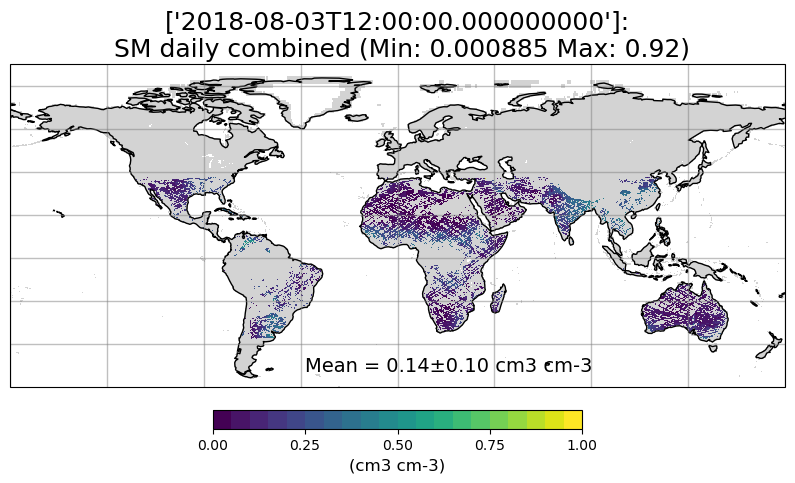

In [11]:
# Apply the combined flag to sm_daily, 1 = bad data, 255 = good data, calculate how many additional values are QC'd out, and then plot the data

sm_daily_combined = sm_daily.copy()
sm_daily_combined[combined_flag == 1] = np.nan

print("Number of data QC-d out:", np.sum(np.isnan(sm_daily_combined)) - np.sum(np.isnan(sm_daily)))
print("The fraction of data QC'd out:", (np.sum(np.isnan(sm_daily_combined)) - np.sum(np.isnan(sm_daily))) / np.sum(~np.isnan(sm_daily)))

obarray[:, 0] = sm_daily_combined
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray, False, True, f'{time.values}:\n SM daily combined (Min: {minval:.3g} Max: {maxval:.3g})', 'cm3 cm-3', 0, 1)

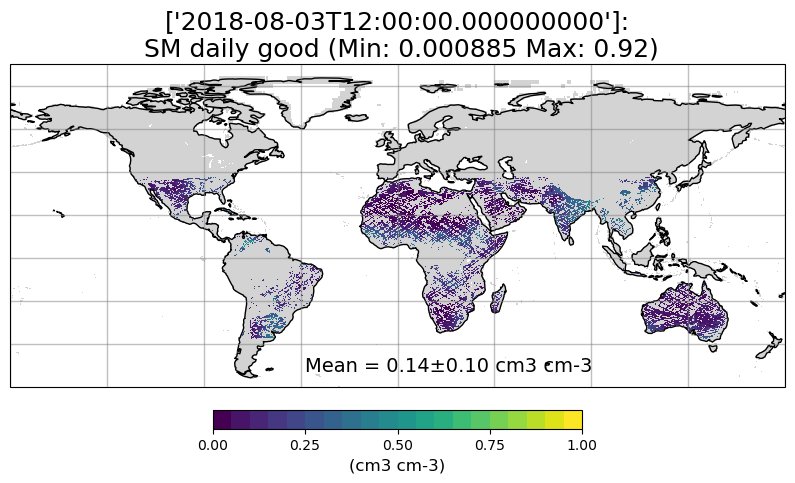

In [12]:
# Make new arrays of lat, lon and sm_daily only containing good data i.e. where combined_flag == 255
lats_good = lats[combined_flag == 255]
lons_good = lons[combined_flag == 255]
sm_daily_good = sm_daily[combined_flag == 255]

# Plot the good data
obarray = np.empty([lats_good.shape[0], 3])
obarray.fill(np.nan)
obarray[:, 1] = lons_good
obarray[:, 2] = lats_good
obarray[:, 0] = sm_daily_good
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray, False, True, f'{time.values}:\n SM daily good (Min: {minval:.3g} Max: {maxval:.3g})', 'cm3 cm-3', 0, 1)

In [13]:
# Use read_obsfcstana_extend_datetime to read /Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803*

from my_functions import read_obsfcstana_extend_datetime

path = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test'
file_name_start = 'OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803'
printflag = True
date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana_extend_datetime(path, file_name_start, printflag)


['/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_0000z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_1200z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_1800z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_0600z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_0300z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_1500z.bin', '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data/cygnss_test/OLv7_M36_MULTI_type_13_comb_fp.ens_avg.ldas_ObsFcstAna.20180803_0900z.bin', '/Users/amfo

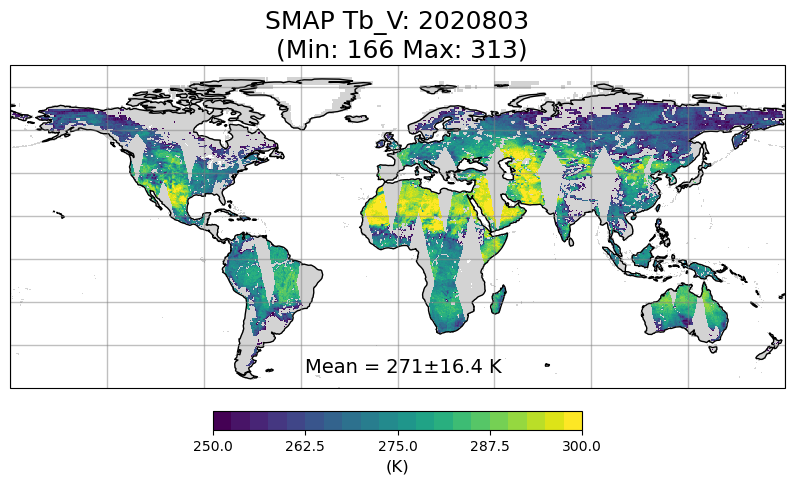

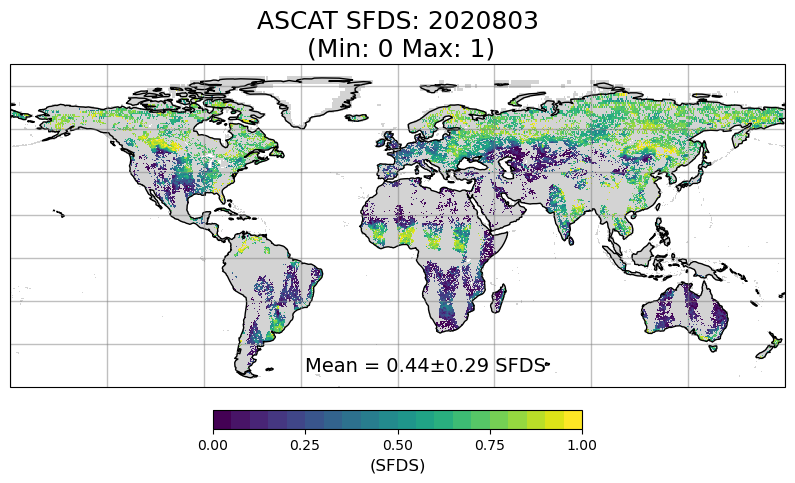

In [14]:


date_time = np.array(date_time)
obs_species = np.array(obs_species)
obs_tilenum = np.array(obs_tilenum)
obs_lon = np.array(obs_lon)
obs_lat = np.array(obs_lat)
obs_obs = np.array(obs_obs)
obs_fcst = np.array(obs_fcst)

# Convert the lists to numpy arrays
a_date_time = np.array(date_time[obs_species > 4])
a_obs_lon = np.array(obs_lon[obs_species > 4])
a_obs_lat = np.array(obs_lat[obs_species > 4])
a_obs_obs = np.array(obs_obs[obs_species > 4])
a_obs_fcst = np.array(obs_fcst[obs_species > 4])
a_obs_ana = np.array(obs_ana[obs_species > 4])

s_date_time = np.array(date_time[obs_species < 5])
s_obs_lon = np.array(obs_lon[obs_species < 5])
s_obs_lat = np.array(obs_lat[obs_species < 5])
s_obs_obs = np.array(obs_obs[obs_species < 5])
s_obs_fcst = np.array(obs_fcst[obs_species < 5])
s_obs_ana = np.array(obs_ana[obs_species < 5])

h_date_time = np.array(date_time[obs_species < 3])
h_obs_lon = np.array(obs_lon[obs_species < 3])
h_obs_lat = np.array(obs_lat[obs_species < 3])
h_obs_obs = np.array(obs_obs[obs_species < 3])
h_obs_fcst = np.array(obs_fcst[obs_species < 3])
h_obs_ana = np.array(obs_ana[obs_species < 3])

# Find obs species value = 3 or 4
v_date_time = np.array(date_time[(obs_species == 3) | (obs_species == 4)])
v_obs_lon = np.array(obs_lon[(obs_species == 3) | (obs_species == 4)])
v_obs_lat = np.array(obs_lat[(obs_species == 3) | (obs_species == 4)])
v_obs_obs = np.array(obs_obs[(obs_species == 3) | (obs_species == 4)])
v_obs_fcst = np.array(obs_fcst[(obs_species == 3) | (obs_species == 4)])
v_obs_ana = np.array(obs_ana[(obs_species == 3) | (obs_species == 4)])

n_obs = len(v_obs_obs)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:, 1] = v_obs_lon
obarray[:, 2] = v_obs_lat
obarray[:, 0] = v_obs_obs
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True, f'SMAP Tb_V: 2020803\n (Min: {minval:.3g} Max: {maxval:.3g})','K', 250, 300)

n_obs = len(a_obs_obs)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:, 1] = a_obs_lon
obarray[:, 2] = a_obs_lat
obarray[:, 0] = a_obs_obs
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True, f'ASCAT SFDS: 2020803\n (Min: {minval:.3g} Max: {maxval:.3g})','SFDS', 0, 1)

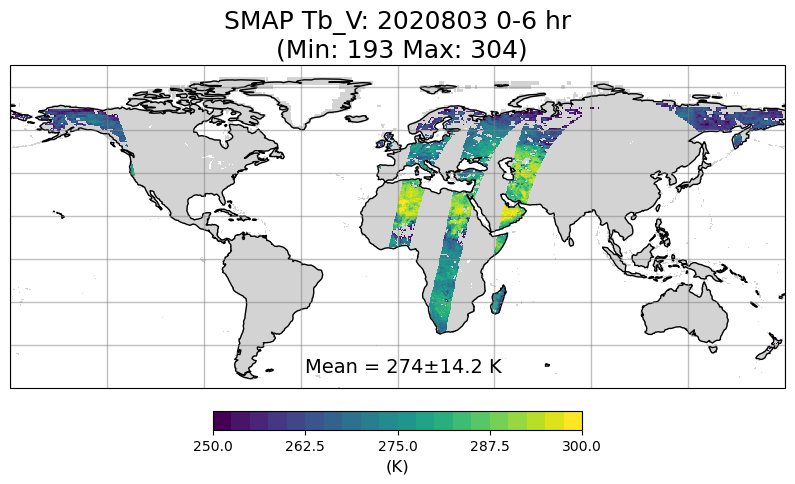

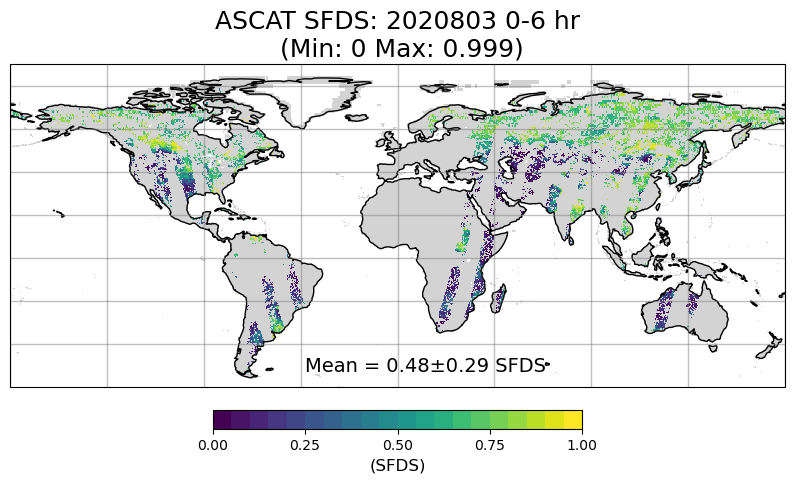

In [15]:
s_06_indices = []

for index, entry in enumerate(v_date_time):
    if 0 < entry['hour'][0] <= 6:
        s_06_indices.append(index)

# Plot the SMAP Tb_V values for the entries with hour between 0 and 6
n_obs = len(s_06_indices)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:, 1] = v_obs_lon[s_06_indices]
obarray[:, 2] = v_obs_lat[s_06_indices]
obarray[:, 0] = v_obs_obs[s_06_indices]
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True, f'SMAP Tb_V: 2020803 0-6 hr\n (Min: {minval:.3g} Max: {maxval:.3g})','K', 250, 300)

a_06_indices = []

for index, entry in enumerate(a_date_time):
    if 0 < entry['hour'][0] <= 6:
        a_06_indices.append(index)

# Plot the ASCAT SFDS values for the entries with hour between 0 and 6
n_obs = len(a_06_indices)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:, 1] = a_obs_lon[a_06_indices]
obarray[:, 2] = a_obs_lat[a_06_indices]
obarray[:, 0] = a_obs_obs[a_06_indices]
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True, f'ASCAT SFDS: 2020803 0-6 hr\n (Min: {minval:.3g} Max: {maxval:.3g})','SFDS', 0, 1)

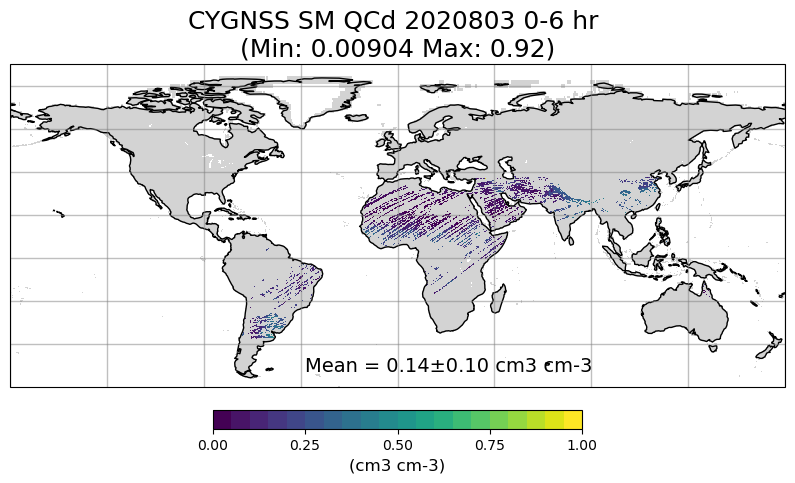

In [26]:
# Find the good values in sm_subdaily_interval_0
good_indices = np.where(combined_flag == 255)[0]

# Find the corresponding good values in sm_subdaily_interval_0
good_sm_subdaily_interval_0 = sm_subdaily_interval_0[good_indices]

# Plot the good values in sm_subdaily_interval_0
n_obs = len(good_indices)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:, 1] = lons[good_indices]
obarray[:, 2] = lats[good_indices]
obarray[:, 0] = good_sm_subdaily_interval_0
maxval = np.nanmax(obarray[:, 0])
minval = np.nanmin(obarray[:, 0])
plot_global_tight_pcm(obarray,False, True, f'CYGNSS SM QCd 2020803 0-6 hr \n(Min: {minval:.3g} Max: {maxval:.3g})','cm3 cm-3', 0, 1)


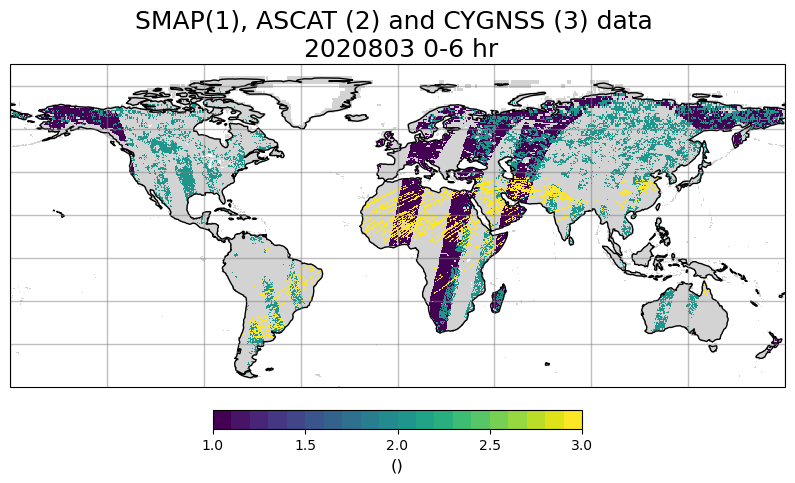

In [27]:

# Get the lats, lons and sm_subdaily for the good values in sm_subdaily_interval_0 only
good_lats = lats[good_indices]
good_lons = lons[good_indices]
good_sm_subdaily = sm_subdaily_interval_0[good_indices]

# Further subset good_lats, good_lons and good_sm_subdaily to only include values where sm_subdaily_interval_0 not nan
good_lats = good_lats[~np.isnan(good_sm_subdaily)]
good_lons = good_lons[~np.isnan(good_sm_subdaily)]
good_sm_subdaily = good_sm_subdaily[~np.isnan(good_sm_subdaily)]

# Make a new n x 3 array that combines v_obs_lon[s_06_indices], v_obs_lat[s_06_indices], v_obs_obs[s_06_indices], a_obs_lon[a_06_indices], a_obs_lat[a_06_indices], a_obs_obs[a_06_indices], good_lons, good_lats, good_sm_subdaily
# With v_obs_obs[s_06_indices] = 1, a_obs_obs[a_06_indices] = 2, good_sm_subdaily = 3

n_obs = len(s_06_indices) + len(a_06_indices) + len(good_lats)
obarray = np.empty([n_obs, 3])
obarray.fill(np.nan)
obarray[:len(s_06_indices), 1] = v_obs_lon[s_06_indices]
obarray[:len(s_06_indices), 2] = v_obs_lat[s_06_indices]
obarray[:len(s_06_indices), 0] = 1
obarray[len(s_06_indices):len(s_06_indices) + len(a_06_indices), 1] = a_obs_lon[a_06_indices]
obarray[len(s_06_indices):len(s_06_indices) + len(a_06_indices), 2] = a_obs_lat[a_06_indices]
obarray[len(s_06_indices):len(s_06_indices) + len(a_06_indices), 0] = 2
obarray[len(s_06_indices) + len(a_06_indices):, 1] = good_lons
obarray[len(s_06_indices) + len(a_06_indices):, 2] = good_lats
obarray[len(s_06_indices) + len(a_06_indices):, 0] = 3

# Plot the combined data
plot_global_tight_pcm(obarray,False, False, f'SMAP(1), ASCAT (2) and CYGNSS (3) data \n 2020803 0-6 hr', '', 1, 3)

In [16]:


import math

def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return c * r


# Using lons and lats for CYGNSS and s_lon and s_lat for SMAP, find the nearest CYGNSS point to each SMAP point, what this distance is, and plot the corresponding SMAP and CYGNSS data

matching_index = np.empty(len(s_obs_lon))

for i in range(len(lons_good)):
    # Print when we're got through 10% of the data
    min_dist = 1000000
    min_index = 0
    for j in range(len(s_obs_lon)):
        dist = haversine(lons_good[i], lats_good[i], s_obs_lon[j], s_obs_lat[j])
        if dist < min_dist:
            min_dist = dist
            min_index = j
    matching_index[i] = min_index

ValueError: math domain error